In [202]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from textblob.classifiers import NaiveBayesClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
import wordcloud
from wordcloud import WordCloud

tweets_data = pd.read_csv('tweets_data.csv', encoding= 'utf-8-sig')
token_data = pd.read_csv('token_data.csv', encoding= 'utf-8-sig')
tweets_dictionnary = pd.read_csv('training_dictionnary.csv', encoding= 'utf-8-sig',delimiter=';')
tweet = tweets_data[tweets_data['cashtags'] == "['ocean']"][['date', 'tweet']]

In [203]:
def sentiment_analysis(tweet):
 def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity
  
 def getPolarity(text):
   return TextBlob(text).sentiment.polarity
  
 tweet['TextBlob_Subjectivity'] = tweet['tweet'].apply(getSubjectivity)
 tweet ['TextBlob_Polarity'] = tweet['tweet'].apply(getPolarity)
 def getSentiment(score):
  if score < 0:
    return 'bearish' #-1 
  elif score == 0:
    return 'neutral'  #0 
  else:
    return 'bullish'  #1 
 tweet ['Sentiment'] = tweet['TextBlob_Polarity'].apply(getSentiment )
 return tweet


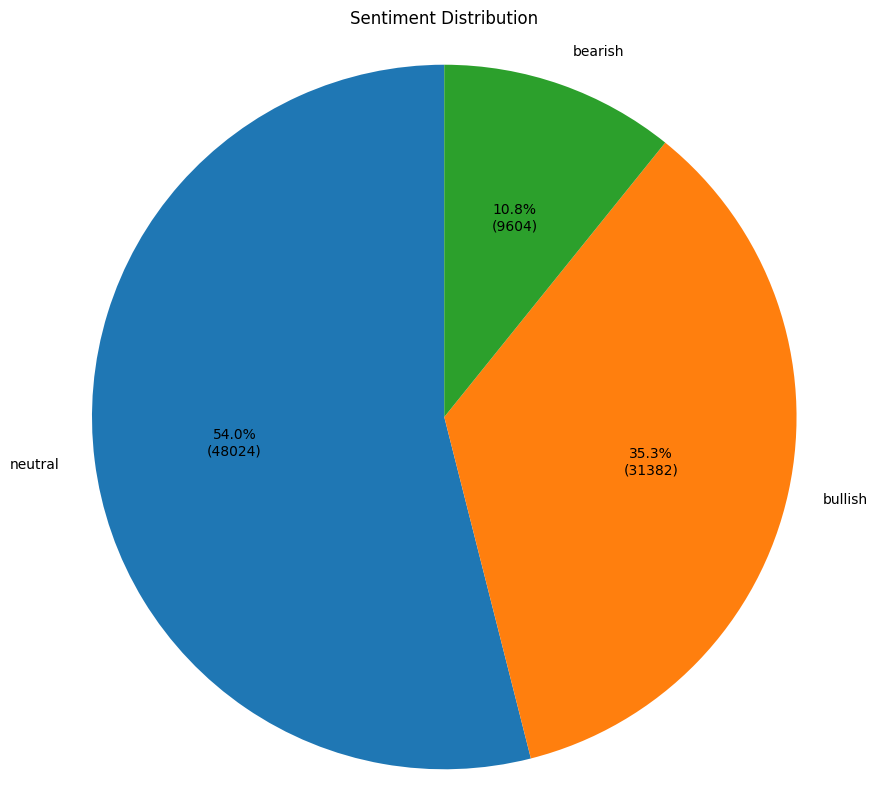

In [205]:
tweet = sentiment_analysis(tweet)

sentiment_counts = tweet['Sentiment'].value_counts()
labels = sentiment_counts.index
sizes = sentiment_counts.values

plt.figure(figsize=(10, 10))
plt.pie(sizes, labels=labels, autopct=lambda pct: f"{pct:.1f}%\n({int(pct/100*sizes.sum())})", startangle=90)
plt.title('Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


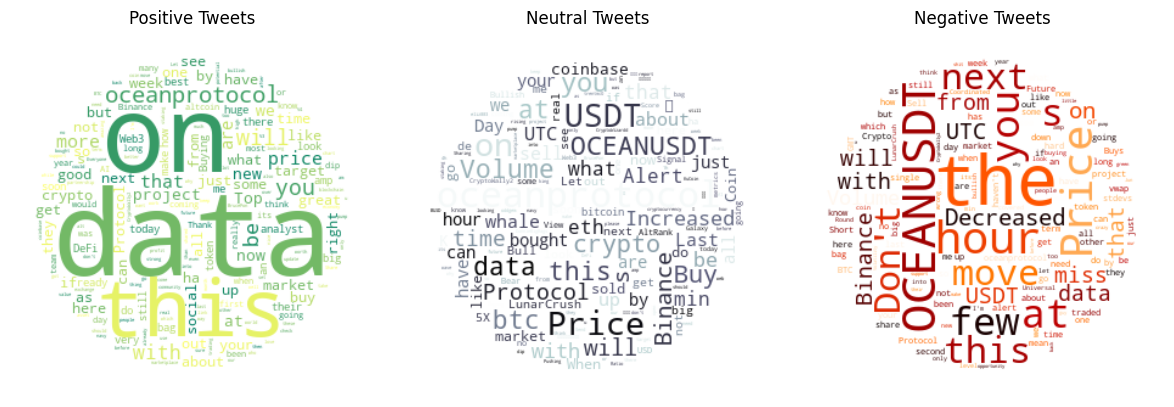

In [206]:
stop_words = ["https", "co", "http","Ocean","the","a","i","I","is","to","and","t","for","it","of","my","CryptoBOT","Cryptobot","in"]
stop_words_2 = ["https", "co", "http", "buy","good","Ocean","a","i","I","is","to","and","for","it","of","t","my","CryptoBOT","Cryptobot","in"]

# Get the positive, neutral, and negative tweets
positive_tweets = tweet[tweet['Sentiment'] == 'bullish']['tweet']
neutral_tweets = tweet[tweet['Sentiment'] == 'neutral']['tweet']
negative_tweets = tweet[tweet['Sentiment'] == 'bearish']['tweet']

# Combine the tweets into single strings
positive_text = ' '.join(positive_tweets)
neutral_text = ' '.join(neutral_tweets)
negative_text = ' '.join(negative_tweets)

x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)



In [ ]:
# Generate word clouds for positive, neutral, and negative tweets
wordcloud_positive = WordCloud(background_color='white', mask = mask ,collocations=False,colormap = "summer",stopwords=stop_words).generate(positive_text)
wordcloud_neutral = WordCloud(background_color='white', mask = mask ,collocations=False,colormap = "bone",stopwords=stop_words).generate(neutral_text)
wordcloud_negative = WordCloud(background_color='white', mask = mask ,collocations=False,colormap = "gist_heat",stopwords=stop_words_2).generate(negative_text)

# Plot the word clouds
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(wordcloud_positive, interpolation='bilinear')
axes[0].set_title('Positive Tweets')
axes[0].axis('off')

axes[1].imshow(wordcloud_neutral, interpolation='bilinear')
axes[1].set_title('Neutral Tweets')
axes[1].axis('off')

axes[2].imshow(wordcloud_negative, interpolation='bilinear')
axes[2].set_title('Negative Tweets')
axes[2].axis('off')

plt.tight_layout()
plt.show()

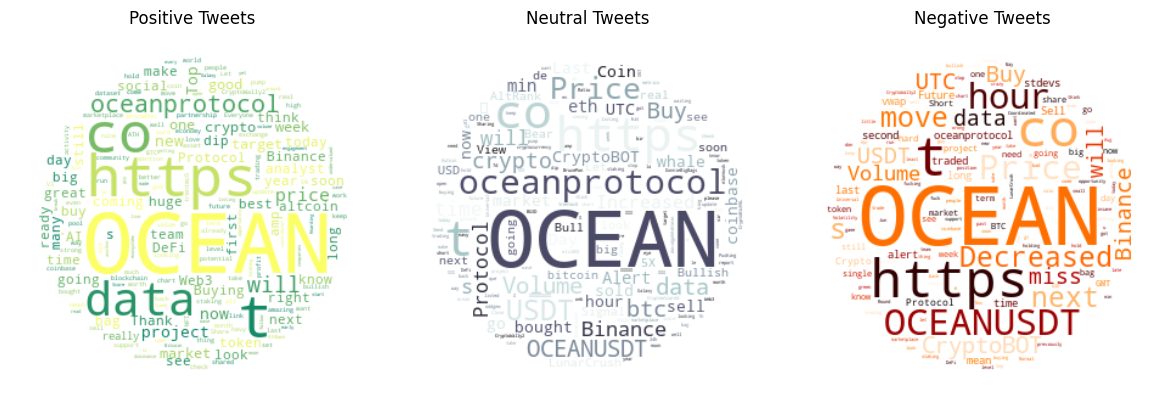

In [207]:
# Generate word clouds for positive, neutral, and negative tweets
wordcloud_positive = WordCloud(background_color='white', mask = mask ,collocations=False,colormap = "summer").generate(positive_text)
wordcloud_neutral = WordCloud(background_color='white', mask = mask ,collocations=False,colormap = "bone").generate(neutral_text)
wordcloud_negative = WordCloud(background_color='white', mask = mask ,collocations=False,colormap = "gist_heat").generate(negative_text)

# Plot the word clouds
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(wordcloud_positive, interpolation='bilinear')
axes[0].set_title('Positive Tweets')
axes[0].axis('off')

axes[1].imshow(wordcloud_neutral, interpolation='bilinear')
axes[1].set_title('Neutral Tweets')
axes[1].axis('off')

axes[2].imshow(wordcloud_negative, interpolation='bilinear')
axes[2].set_title('Negative Tweets')
axes[2].axis('off')

plt.tight_layout()
plt.show()

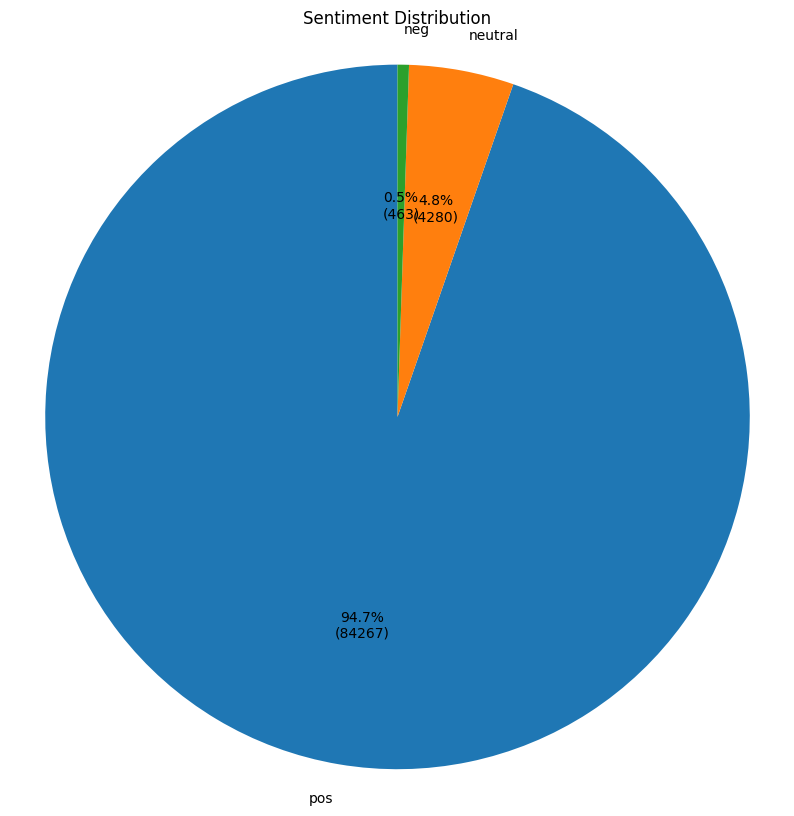

In [208]:
training_data = pd.read_csv('training_dictionnary.csv', encoding='utf-8-sig', delimiter=';')

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', MultinomialNB())
])

X_train = training_data['expression']
y_train = training_data['sentiment']
pipeline.fit(X_train, y_train)

def sentiment_analysis2(tweet):
    tweet['Sentiment'] = pipeline.predict(tweet['tweet'])
    return tweet

tweet = sentiment_analysis2(tweet)

sentiment_counts = tweet['Sentiment'].value_counts()
labels = sentiment_counts.index
sizes = sentiment_counts.values

plt.figure(figsize=(10, 10))
plt.pie(sizes, labels=labels, autopct=lambda pct: f"{pct:.1f}%\n({int(pct/100*sizes.sum())})", startangle=90)
plt.title('Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [209]:
def sentiment_analysis3(tweet):
 def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity
  
 def getPolarity(text):
   return TextBlob(text).sentiment.polarity
  
 tweet['TextBlob_Subjectivity'] = tweet['tweet'].apply(getSubjectivity)
 tweet ['TextBlob_Polarity'] = tweet['tweet'].apply(getPolarity)
 def getSentiment(score):
  if score < 0:
    return -1 
  elif score == 0:
    return 0 
  else:
    return 1 
 tweet ['Sentiment'] = tweet['TextBlob_Polarity'].apply(getSentiment )
 return tweet

In [210]:
tweet = sentiment_analysis3(tweet)

sentiment_by_date = tweet.groupby('date')['Sentiment'].sum().reset_index()


In [211]:
price_token_data = token_data[['Date', 'Open']]
fused_data_sentiment = pd.merge(sentiment_by_date,price_token_data,left_on='date',right_on='Date')
correlation_sent = fused_data_sentiment['Sentiment'].corr(fused_data_sentiment['Open'], method='pearson')
print(correlation_sent) 

0.3511709743740338


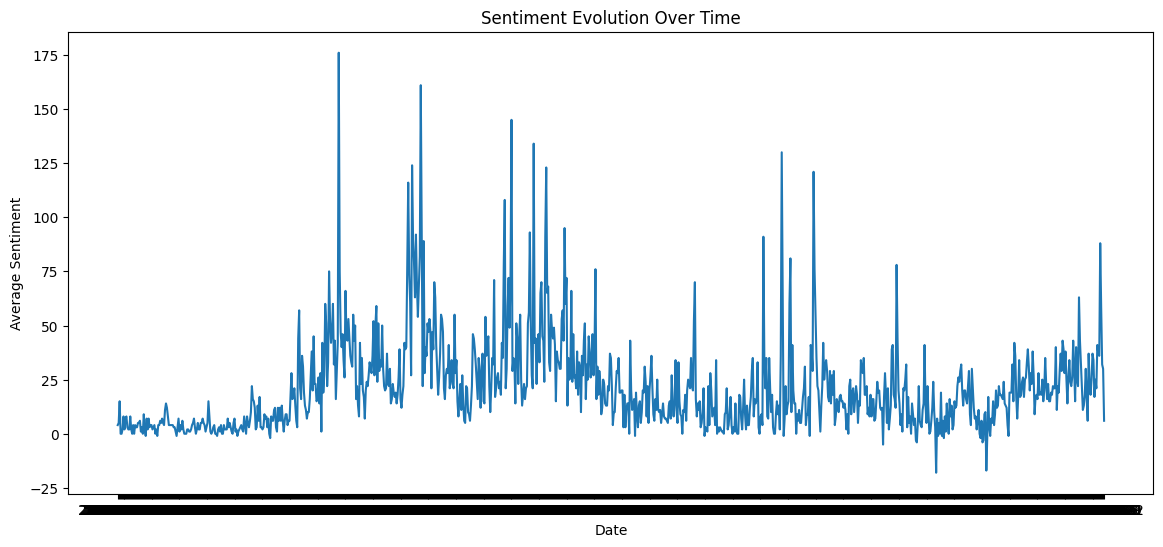

In [212]:

plt.figure(figsize=(14, 6))
plt.plot(sentiment_by_date['date'], sentiment_by_date['Sentiment'])
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.title('Sentiment Evolution Over Time')
plt.show()

